In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('/content/ObesityDataSet_raw_and_data_sinthetic.csv')

In [53]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [54]:
df.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [55]:
col = np.array(df.columns)
col

array(['Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'NObeyesdad'], dtype=object)

In [56]:
df.shape

(2111, 17)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [58]:
df['Gender'].value_counts()

Male      1068
Female    1043
Name: Gender, dtype: int64

In [59]:
df['FAVC'].describe()

count     2111
unique       2
top        yes
freq      1866
Name: FAVC, dtype: object

In [60]:
def plot_visual(data, attr):
    plt.hist(data[attr], bins="fd")
    plt.axvline(data[attr].mean(), color="orange", label="mean")
    plt.axvline(data[attr].median(), color="green", label="median")
    plt.xlabel(f"{attr}")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

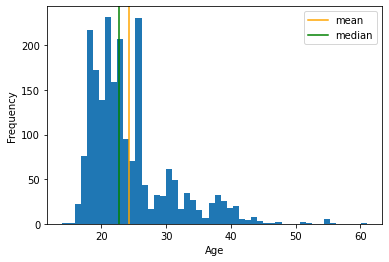

In [61]:
plot_visual(df, 'Age')

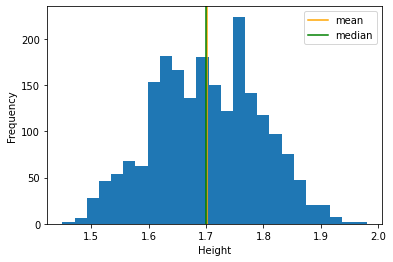

In [62]:
plot_visual(df, 'Height')

In [63]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


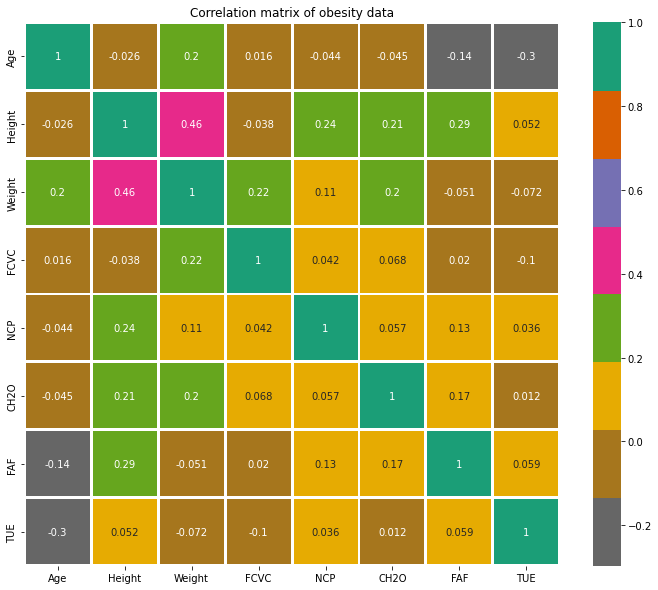

In [64]:
plt.figure(figsize = (12, 10))
sns.heatmap(df.corr(),
           annot = True,
           cmap = "Dark2_r",
           linewidths = 2, 
           linecolor = "white")
plt.title("Correlation matrix of obesity data")
plt.show()

In [65]:
# Pre-processing

# Using pandas.get_dummies to One Hot Encode non numerical values
df_num = df[["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]]
# df_num.head()

df_ohe = pd.get_dummies(df[["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"]])
# df_ohe.head()

df_class = df.iloc[:, -1]
# df_class

In [66]:
df_concat = pd.concat([df_num, df_ohe, df_class], axis=1)
# df_concat.head()
df_concat.shape

(2111, 32)

In [67]:
df_X = df_concat.iloc[:, :-1]
df_y = df_concat.iloc[:, -1]

df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 2111 non-null   float64
 1   Height                              2111 non-null   float64
 2   Weight                              2111 non-null   float64
 3   FCVC                                2111 non-null   float64
 4   NCP                                 2111 non-null   float64
 5   CH2O                                2111 non-null   float64
 6   FAF                                 2111 non-null   float64
 7   TUE                                 2111 non-null   float64
 8   Gender_Female                       2111 non-null   uint8  
 9   Gender_Male                         2111 non-null   uint8  
 10  family_history_with_overweight_no   2111 non-null   uint8  
 11  family_history_with_overweight_yes  2111 no

In [68]:
# To scale the features, there's a need to convert their dtype to float

df_X = df_X.astype('float')
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 2111 non-null   float64
 1   Height                              2111 non-null   float64
 2   Weight                              2111 non-null   float64
 3   FCVC                                2111 non-null   float64
 4   NCP                                 2111 non-null   float64
 5   CH2O                                2111 non-null   float64
 6   FAF                                 2111 non-null   float64
 7   TUE                                 2111 non-null   float64
 8   Gender_Female                       2111 non-null   float64
 9   Gender_Male                         2111 non-null   float64
 10  family_history_with_overweight_no   2111 non-null   float64
 11  family_history_with_overweight_yes  2111 no

In [69]:
# Scaling - with MinMaxScaler

mms = MinMaxScaler(feature_range=(0, 1))
df_X_sca = mms.fit_transform(df_X)
df_X_sca

array([[0.14893617, 0.32075472, 0.18656716, ..., 0.        , 1.        ,
        0.        ],
       [0.14893617, 0.13207547, 0.12686567, ..., 0.        , 1.        ,
        0.        ],
       [0.19148936, 0.66037736, 0.28358209, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.18136247, 0.5702    , 0.70663696, ..., 0.        , 1.        ,
        0.        ],
       [0.22046672, 0.54613208, 0.70407941, ..., 0.        , 1.        ,
        0.        ],
       [0.20563211, 0.54497358, 0.70501971, ..., 0.        , 1.        ,
        0.        ]])

In [70]:
# Label Encoding for class

lae = LabelEncoder()
df_y_enc = lae.fit_transform(df_y)
df_y_enc

array([1, 1, 1, ..., 4, 4, 4])

In [71]:
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df_X, 
                                                df_y_enc, 
                                                test_size = 0.2, 
                                                stratify = df_y_enc, 
                                                random_state =  42)

df_X_train
df_y_train
df_X_train.shape, df_y_train.shape, df_X_test.shape, df_y_test.shape

((1688, 31), (1688,), (423, 31), (423,))

In [72]:
# Building the model

dt_model = DecisionTreeClassifier(max_depth=13, random_state=42)

In [73]:
# A function to fit the model, predict and display performance metrics
from sklearn import tree
def model_performance(model, tr_attr, tr_class, te_attr, te_class, c):
    model.fit(tr_attr, tr_class)
    print(classification_report(te_class, model.predict(te_attr), zero_division=True))
    sns.heatmap(confusion_matrix(te_class, model.predict(te_attr)), annot=True, cmap=c)
    

              precision    recall  f1-score   support

           0       0.96      0.87      0.91        54
           1       0.80      0.84      0.82        58
           2       0.91      0.96      0.93        70
           3       0.97      0.95      0.96        60
           4       1.00      0.98      0.99        65
           5       0.86      0.86      0.86        58
           6       0.91      0.91      0.91        58

    accuracy                           0.91       423
   macro avg       0.92      0.91      0.91       423
weighted avg       0.92      0.91      0.92       423



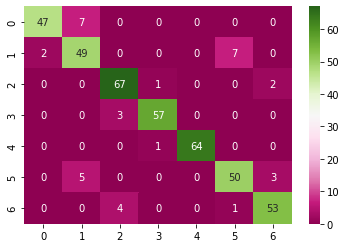

In [74]:
model_performance(dt_model, df_X_train, df_y_train, df_X_test, df_y_test, "PiYG")

In [75]:
tree.export_graphviz(dt_model,
                     out_file="tree.dot",
                     feature_names = df_X_train.columns, 
                     class_names = df['NObeyesdad'].unique(),
                     filled = True)

In [76]:
! dot -Tpng tree.dot -o tree.png

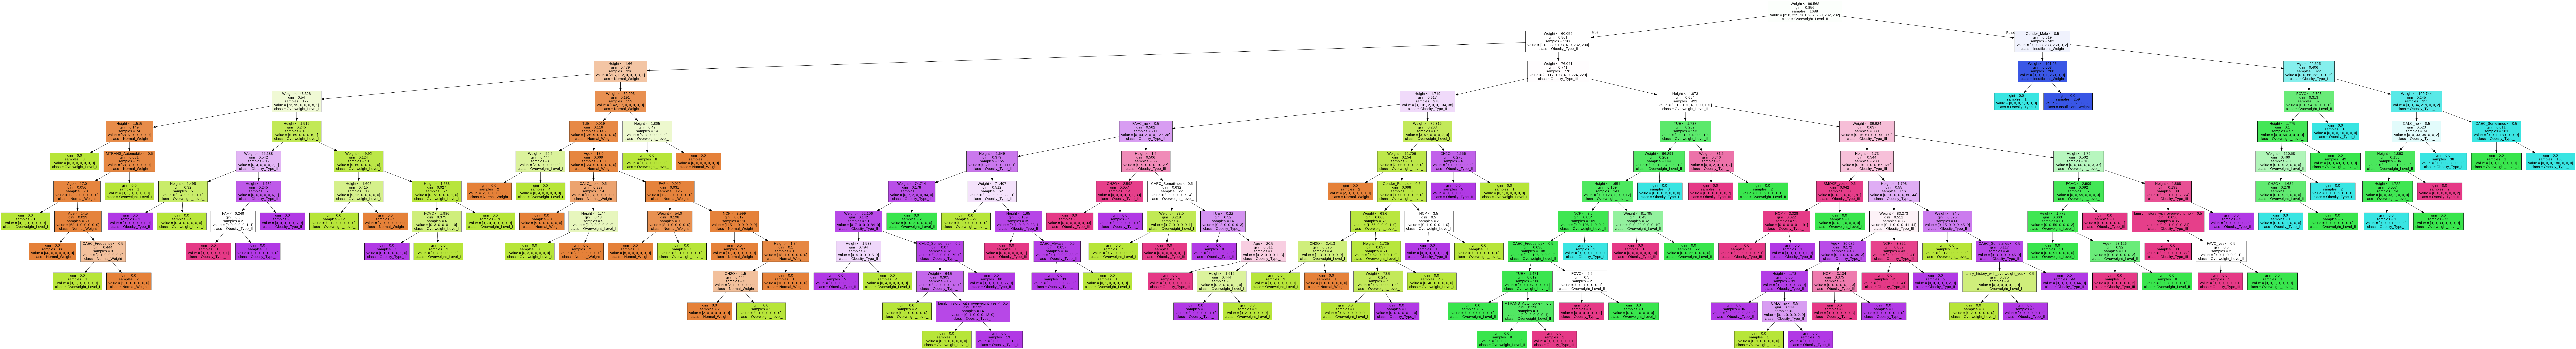

In [77]:
from IPython.display import Image
Image(filename='tree.png')

In [78]:
dt_prob = dt_model.predict_proba(df_X_test)
roc_auc_score(df_y_test, dt_prob, multi_class = "ovr")

0.948826099443833

In [79]:
# SVM (Linear SVC)

svc = SVC(kernel='linear', random_state=0)  
svc.fit(df_X_train, df_y_train)  

SVC(kernel='linear', random_state=0)

In [80]:
svc_y_pred = svc.predict(df_X_test)
svc_y_pred

array([0, 1, 5, 4, 3, 2, 3, 1, 2, 5, 0, 1, 4, 5, 1, 5, 2, 6, 6, 1, 1, 3,
       3, 5, 2, 5, 2, 4, 6, 2, 3, 2, 5, 5, 3, 1, 3, 0, 4, 0, 5, 0, 4, 4,
       6, 4, 0, 6, 3, 5, 4, 0, 5, 3, 5, 0, 4, 4, 4, 3, 5, 6, 0, 6, 5, 2,
       2, 0, 3, 2, 4, 5, 0, 0, 2, 0, 0, 0, 2, 2, 5, 6, 4, 2, 1, 1, 3, 5,
       6, 6, 3, 6, 2, 2, 5, 1, 0, 1, 4, 3, 2, 3, 3, 5, 6, 4, 2, 2, 6, 3,
       6, 1, 4, 3, 4, 4, 0, 4, 1, 1, 4, 6, 4, 0, 2, 3, 2, 6, 5, 3, 4, 2,
       0, 0, 0, 5, 3, 6, 3, 0, 4, 3, 3, 2, 2, 3, 2, 2, 1, 5, 5, 5, 4, 0,
       3, 3, 4, 2, 5, 6, 6, 3, 2, 2, 4, 5, 5, 6, 6, 3, 5, 1, 1, 3, 3, 5,
       2, 5, 1, 5, 2, 3, 2, 3, 0, 0, 0, 4, 5, 5, 1, 5, 4, 5, 1, 3, 6, 1,
       3, 2, 3, 4, 6, 3, 5, 0, 2, 5, 1, 3, 0, 4, 5, 6, 6, 6, 6, 2, 2, 6,
       1, 4, 2, 2, 1, 5, 3, 4, 3, 5, 2, 0, 2, 4, 2, 5, 5, 0, 3, 6, 4, 1,
       4, 2, 5, 5, 1, 0, 2, 3, 6, 1, 4, 1, 3, 4, 2, 4, 6, 3, 4, 2, 1, 2,
       4, 2, 6, 4, 6, 2, 2, 0, 4, 5, 6, 4, 3, 0, 6, 4, 2, 4, 5, 0, 1, 1,
       2, 6, 6, 4, 5, 1, 0, 1, 2, 0, 5, 5, 6, 1, 6,

              precision    recall  f1-score   support

           0       0.86      0.93      0.89        54
           1       0.76      0.67      0.72        58
           2       0.87      0.87      0.87        70
           3       0.92      0.98      0.95        60
           4       1.00      0.98      0.99        65
           5       0.71      0.83      0.76        58
           6       0.81      0.67      0.74        58

    accuracy                           0.85       423
   macro avg       0.85      0.85      0.85       423
weighted avg       0.85      0.85      0.85       423



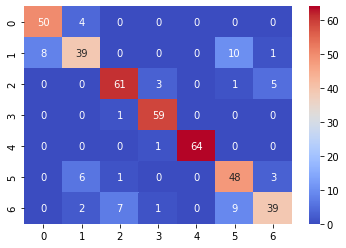

In [81]:
model_performance(svc, df_X_train, df_y_train, df_X_test, df_y_test, "coolwarm")

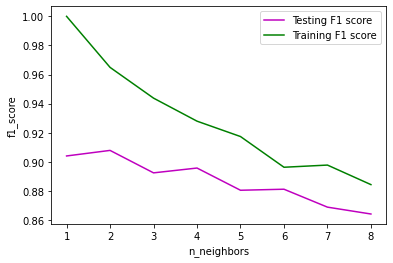

In [82]:
# Based on f1_score trying to find best num of n_neighors

neighbors = np.arange(1, 9)

tr_f1 = []
te_f1 = []

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(df_X_train, df_y_train)
    
    tr_f1.append(f1_score(df_y_train, knn.predict(df_X_train), average = 'weighted'))
    te_f1.append(f1_score(df_y_test, knn.predict(df_X_test), average = 'weighted'))

plt.plot(neighbors, te_f1, label = 'Testing F1 score', color='m')
plt.plot(neighbors, tr_f1, label = 'Training F1 score', color='g')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('f1_score')
plt.show()


              precision    recall  f1-score   support

           0       0.87      0.98      0.92        54
           1       0.89      0.67      0.76        58
           2       0.93      0.96      0.94        70
           3       0.95      0.98      0.97        60
           4       1.00      1.00      1.00        65
           5       0.79      0.91      0.85        58
           6       0.94      0.84      0.89        58

    accuracy                           0.91       423
   macro avg       0.91      0.91      0.91       423
weighted avg       0.91      0.91      0.91       423



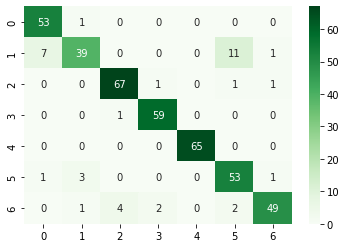

In [83]:
# Best f1_score at n_neighbors = 2

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(df_X_train, df_y_train)

model_performance(knn, df_X_train, df_y_train, df_X_test, df_y_test, "Greens")

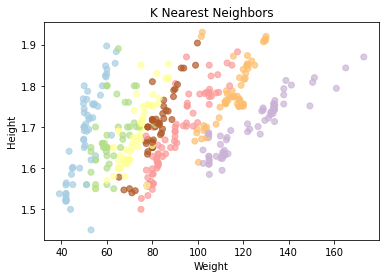

In [84]:
plt.scatter(
    df_X_test['Weight'],
    df_X_test['Height'],
    c=knn.predict(df_X_test),
    cmap='Paired',
    alpha=0.7
)
plt.title('K Nearest Neighbors')
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

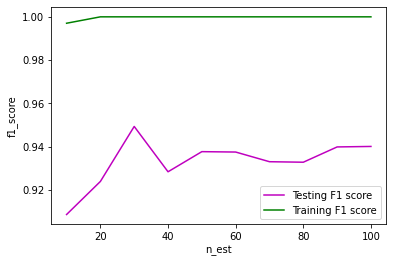

In [85]:
# Based on f1_score trying to find best num of n_estimators

n_est = np.arange(10, 110, 10)

tr_acc = []
te_acc = []

for i, k in enumerate(n_est):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(df_X_train, df_y_train)
    
    tr_acc.append(f1_score(df_y_train, rfc.predict(df_X_train), average = 'weighted'))
    te_acc.append(f1_score(df_y_test, rfc.predict(df_X_test), average = 'weighted'))

plt.plot(n_est, te_acc, label = 'Testing F1 score', color='m')
plt.plot(n_est, tr_acc, label = 'Training F1 score', color='g')

plt.legend()
plt.xlabel('n_est')
plt.ylabel('f1_score')
plt.show()

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        54
           1       0.74      0.88      0.80        58
           2       0.90      0.93      0.92        70
           3       1.00      0.98      0.99        60
           4       1.00      0.98      0.99        65
           5       0.87      0.83      0.85        58
           6       0.94      0.86      0.90        58

    accuracy                           0.91       423
   macro avg       0.92      0.91      0.92       423
weighted avg       0.92      0.91      0.92       423



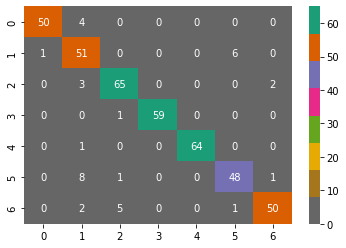

In [91]:
# Best f1_score is for 80 estimators
model_performance(RandomForestClassifier(n_estimators=30), df_X_train, df_y_train, df_X_test, df_y_test, "Dark2_r")

Text(0, 0.5, 'f1_score')

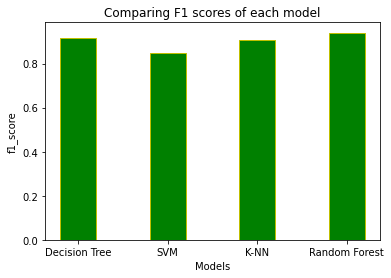

In [92]:
dt_f1 = f1_score(df_y_test, dt_model.predict(df_X_test), average='weighted')
svc_f1 = f1_score(df_y_test, svc.predict(df_X_test), average='weighted')
knn_f1 = f1_score(df_y_test, knn.predict(df_X_test), average='weighted')
rfc_f1 = f1_score(df_y_test, rfc.predict(df_X_test), average='weighted')

scores = [dt_f1, svc_f1, knn_f1, rfc_f1]
models = ['Decision Tree', 'SVM', 'K-NN', 'Random Forest']

plt.bar(models, scores, color='g', edgecolor='y', width=0.4)
plt.title('Comparing F1 scores of each model')
plt.xlabel('Models')
plt.ylabel('f1_score')

In [93]:
dt_f1, svc_f1, knn_f1, rfc_f1
f1_dict = dict(zip(models, scores))

for a, b in f1_dict.items():
  print(a + ": " + str(b))

Decision Tree: 0.9152724912457364
SVM: 0.8491288240385348
K-NN: 0.9079733011964328
Random Forest: 0.9400326379580526


Text(0, 0.5, 'accuracy_score')

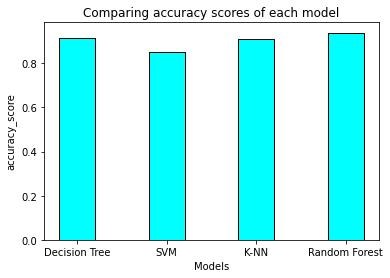

In [94]:
dt_f1 = accuracy_score(df_y_test, dt_model.predict(df_X_test))
svc_f1 = accuracy_score(df_y_test, svc.predict(df_X_test))
knn_f1 = accuracy_score(df_y_test, knn.predict(df_X_test))
rfc_f1 = accuracy_score(df_y_test, rfc.predict(df_X_test))

scores = [dt_f1, svc_f1, knn_f1, rfc_f1]
models = ['Decision Tree', 'SVM', 'K-NN', 'Random Forest']

plt.bar(models, scores, color='cyan', edgecolor='k', width=0.4)
plt.title('Comparing accuracy scores of each model')
plt.xlabel('Models')
plt.ylabel('accuracy_score')

In [95]:
dt_f1, svc_f1, knn_f1, rfc_f1
f1_dict = dict(zip(models, scores))

for a, b in f1_dict.items():
  print(a + ": " + str(b))

Decision Tree: 0.9148936170212766
SVM: 0.851063829787234
K-NN: 0.9101654846335697
Random Forest: 0.9385342789598109
